# Dataset generator

## Train datasets

In [1]:
import deeptrack as dt 
from numpy.random import uniform
import numpy as np
from Moon import Moon
from Star import Star
from matplotlib import pyplot as plt
from torch.utils.data import ConcatDataset
import torch

image_size = 32

particle1 = dt.Ellipse(
            intensity = 5.0,
            position_unit="pixel",
            position=lambda: uniform(image_size / 2 - 5, image_size / 2 + 5, size=2),
            radius=(5, 5)*dt.units.pixel,
        )

particle2 = dt.Ellipse(
            intensity = 5.0,
            position_unit="pixel",
            position=lambda: uniform(image_size / 2 - 5, image_size / 2 + 5, size=2),
            radius=(5, 12)*dt.units.pixel,
            rotation=lambda: np.random.uniform(0, 2 * np.pi),   
        )

particle3 = Moon(
            intensity = 5.0,
            position_unit="pixel",
            position=lambda: uniform(image_size / 2 - 5, image_size / 2 + 5, size=2),
            size=20*dt.units.pixel,
            rotation=lambda: np.random.uniform(0, 2 * np.pi),   
        )

particle4 = Star(
            intensity = 5.0,
            position_unit="pixel",
            position=lambda: uniform(image_size / 2 - 5, image_size / 2 + 5, size=2),
            radius=(5, 12)*dt.units.pixel,
            corner_extension=5*dt.units.pixel,
            rotation=lambda: np.random.uniform(0, 2 * np.pi),   
        )

optics = dt.Fluorescence(output_region=(0, 0, image_size, image_size))

import torch

simulation1 = (
    optics(particle1) 
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

simulation2 = (
    optics(particle2) 
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

simulation3 = (
    optics(particle3) 
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

simulation4 = (
    optics(particle4) 
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

Moon particle

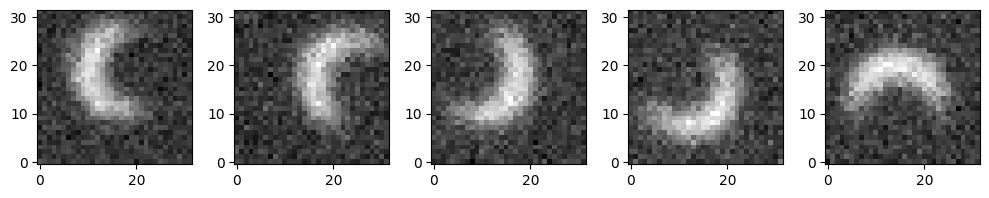

In [2]:
train_datasetM = dt.pytorch.Dataset(simulation3 & [0], length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, lab  = train_datasetM[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

Star particle

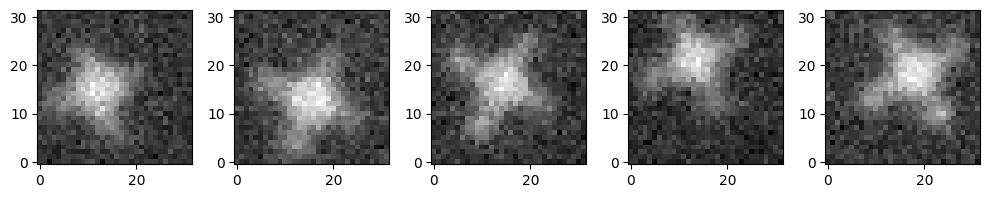

In [3]:
train_datasetS = dt.pytorch.Dataset(simulation4 & [0], length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, lab  = train_datasetS[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

### 1 particle

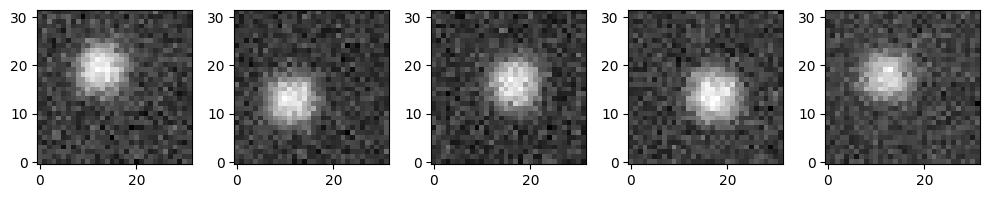

In [4]:
train_dataset1 = dt.pytorch.Dataset(simulation1 & [0], length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, lab  = train_dataset1[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

### 2 particles

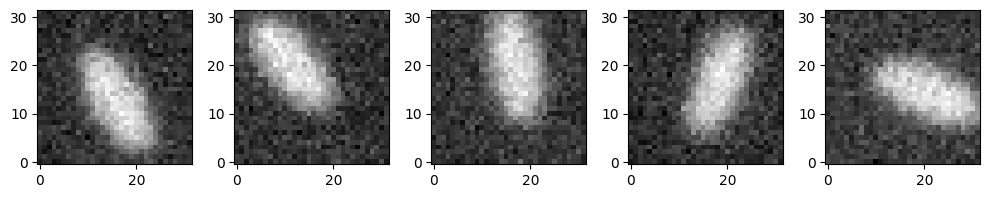

In [5]:
train_dataset2 = dt.pytorch.Dataset(simulation2 & [1], length=100)
train_dataset2 = ConcatDataset([train_dataset1, train_dataset2])

plt.figure(figsize=(10, 2))
for i in range(5):
	
	image, lab  = train_dataset2[int(i+100)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

### 3 particles

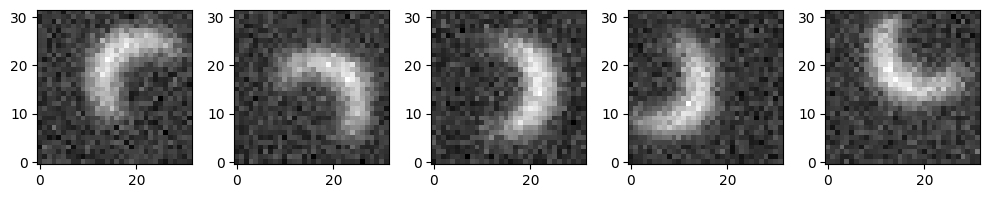

In [6]:
train_dataset3 = dt.pytorch.Dataset(simulation3 & [2], length=100)
train_dataset3 = ConcatDataset([train_dataset2, train_dataset3])

plt.figure(figsize=(10, 2))
for i in range(5):
	
	image, lab  = train_dataset3[int(i+200)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()


## Test datasets

In [7]:
test_image_size = 96
test_optics = dt.Fluorescence(output_region=(0, 0, test_image_size, test_image_size))

test_particle1 = dt.Ellipse(
            intensity = 5.0,
            position_unit="pixel",
            position=lambda: uniform(test_image_size / 2 - 30, test_image_size / 2 + 30, size=2),
            radius=(5, 5)*dt.units.pixel,
        )

test_particle2 = dt.Ellipse(
            intensity = 5.0,
            position_unit="pixel",
            position=lambda: uniform(test_image_size / 2 - 30, test_image_size / 2 + 30, size=2),
            radius=(5, 12)*dt.units.pixel,
            rotation=lambda: np.random.uniform(0, 2 * np.pi),   
        )

test_particle3 = Moon(
            intensity = 5.0,
            position_unit="pixel",
            position=lambda: uniform(test_image_size / 2 - 30, test_image_size / 2 + 30, size=2),
            size=20*dt.units.pixel,
            rotation=lambda: np.random.uniform(0, 2 * np.pi),   
        )

test_particle4 = Star(
            intensity = 5.0,
            position_unit="pixel",
            position=lambda: uniform(test_image_size / 2 - 30, test_image_size / 2 + 30, size=2),
			radius=(5, 12)*dt.units.pixel,
            corner_extension=5*dt.units.pixel,
            rotation=lambda: np.random.uniform(0, 2 * np.pi),   
        )

simulation_a = (
    test_optics(test_particle1)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

simulation_b = (
    test_optics(test_particle1 & test_particle2)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

simulation_c = (
    test_optics(test_particle1 & test_particle2 & test_particle3)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

simulation_d = (
    test_optics(test_particle1 & test_particle2 & test_particle4)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

simulation1 = (
    test_optics(test_particle1)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

simulation2 = (
    test_optics(test_particle2)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

simulation3 = (
    test_optics(test_particle3)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

simulation4 = (
    test_optics(test_particle4)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

simulationM = (
    test_optics(test_particle3)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

simulation5 = (
    test_optics(test_particle3)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

simulationS = (
    test_optics(test_particle4)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

simulation6 = (
    test_optics(test_particle4)
    >> dt.NormalizeMinMax(0, 1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

### Moon particle

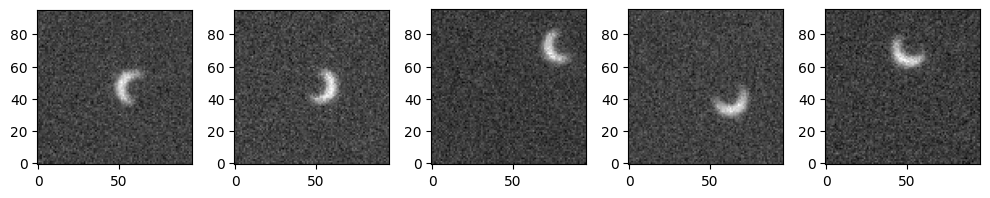

In [8]:
test_datasetM = dt.pytorch.Dataset(simulationM & simulation5 & particle3.position, length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, *_  = test_datasetM[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

### Star particle

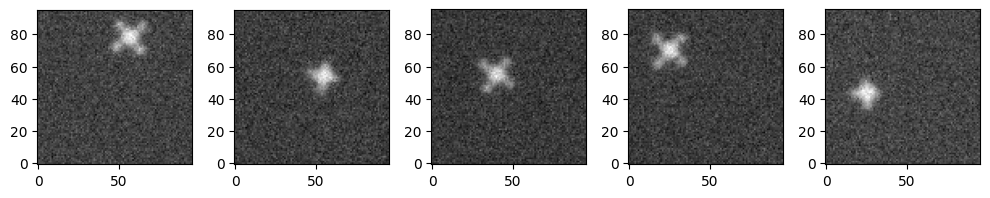

In [9]:
test_datasetS = dt.pytorch.Dataset(simulationS & simulation6 & particle4.position, length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, *_  = test_datasetS[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

### 1 particle

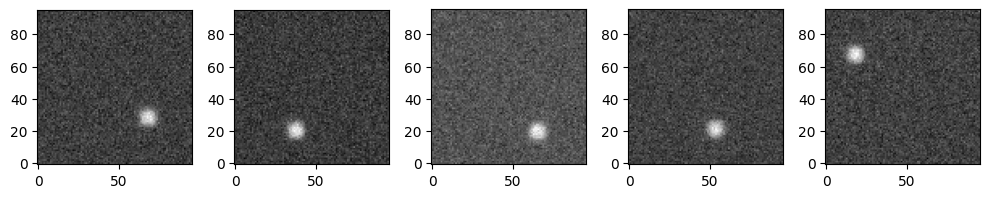

In [10]:
test_dataset1 = dt.pytorch.Dataset(simulation_a & simulation1 & test_particle1.position, length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, *_  = test_dataset1[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

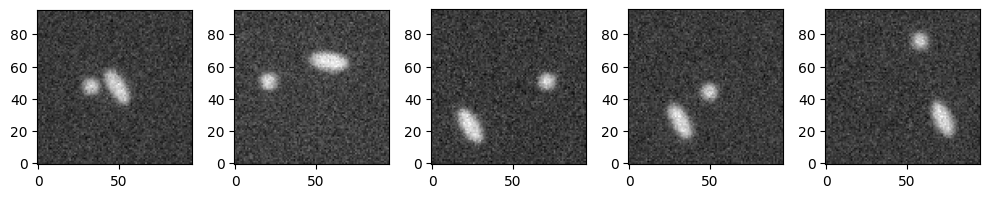

In [11]:
test_dataset2 = dt.pytorch.Dataset(simulation_b & simulation1 & simulation2 & test_particle1.position & test_particle2.position, length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	image, *_  = test_dataset2[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

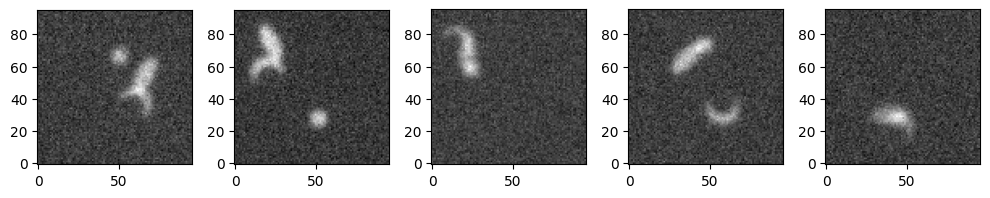

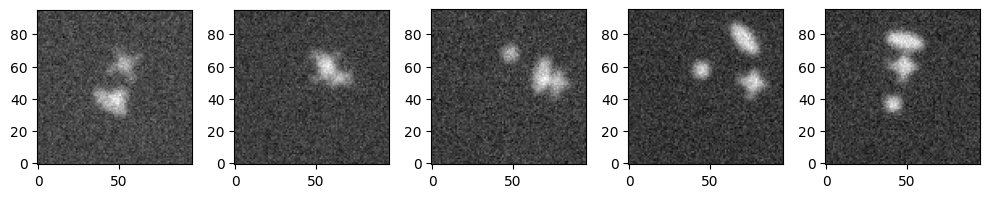

In [12]:
test_dataset3m = dt.pytorch.Dataset(simulation_c & simulation1 & simulation2 & simulation3 & test_particle1.position & test_particle2.position & test_particle3.position, length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	
	image, *_  = test_dataset3m[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

test_dataset3s = dt.pytorch.Dataset(simulation_d & simulation1 & simulation2 & simulation4 & test_particle1.position & test_particle2.position & test_particle4.position, length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
	
	image, *_  = test_dataset3s[int(i)]
	plt.subplot(1, 5, i+1)
	plt.imshow(image[0], cmap="gray", origin="lower")
plt.tight_layout()
plt.show()

## Dense dataset

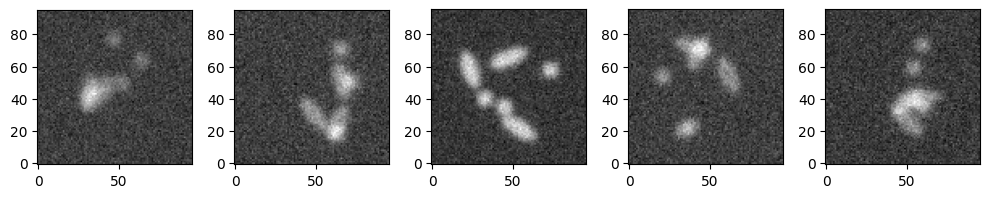

In [13]:
three_particles1 = test_particle1^3
three_particles2 = test_particle2^3

dense_simulation = (
    test_optics(three_particles1 & three_particles2) 
    >> dt.NormalizeMinMax(0, 1)
    >> dt.Gaussian(sigma=0.1)
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

dense_dataset = dt.pytorch.Dataset(dense_simulation, length=100)

plt.figure(figsize=(10, 2))
for i in range(5):
    image = dense_dataset[int(i)]  # Fetch image and label from the dataset
    image = image[0]  # Remove extra dimension
    plt.subplot(1, 5, i+1)
    plt.imshow(image.squeeze(), cmap="gray", origin="lower")  # Remove extra dimension
plt.tight_layout()
plt.show()

Save the datasets

In [14]:
# Dataset 3s
train_dataset_list = [(img, label) for img, label in train_dataset3]
test_dataset_list = [(img, sim1, sim2, sim3, pos1, pos2, pos3) for img, sim1, sim2, sim3, pos1, pos2, pos3 in test_dataset3s]

combined_dataset = {
    'train': train_dataset_list,
    'test': test_dataset_list
}

torch.save(combined_dataset, 'dataset3s.pt')

In [23]:
# Moon Dataset
train_dataset_list = [(img, label) for img, label in train_datasetM]
test_dataset_list = [(img, sim1, pos1) for img, sim1, pos1 in test_datasetM]

combined_dataset = {
    'train': train_dataset_list,
    'test': test_dataset_list
}

torch.save(combined_dataset, 'moon.pt')

# Star Dataset
train_dataset_list = [(img, label) for img, label in train_datasetS]
test_dataset_list = [(img, sim1, pos1) for img, sim1, pos1 in test_datasetS]

combined_dataset = {
    'train': train_dataset_list,
    'test': test_dataset_list
}

torch.save(combined_dataset, 'star.pt')

# Dataset 1
train_dataset_list = [(img, label) for img, label in train_dataset1]
test_dataset_list = [(img, sim1, pos1) for img, sim1, pos1 in test_dataset1]

combined_dataset = {
    'train': train_dataset_list,
    'test': test_dataset_list
}

torch.save(combined_dataset, 'dataset1.pt')

# Dataset 2
train_dataset_list = [(img, label) for img, label in train_dataset2]
test_dataset_list = [(img, sim1, sim2, pos1, pos2) for img, sim1, sim2, pos1, pos2 in test_dataset2]

combined_dataset = {
    'train': train_dataset_list,
    'test': test_dataset_list
}

torch.save(combined_dataset, 'dataset2.pt')

# Dataset 3m
train_dataset_list = [(img, label) for img, label in train_dataset3]
test_dataset_list = [(img, sim1, sim2, sim3, pos1, pos2, pos3) for img, sim1, sim2, sim3, pos1, pos2, pos3 in test_dataset3m]

combined_dataset = {
    'train': train_dataset_list,
    'test': test_dataset_list
}

torch.save(combined_dataset, 'dataset3m.pt')

# Dataset 3s
train_dataset_list = [(img, label) for img, label in train_dataset3]
test_dataset_list = [(img, sim1, sim2, sim3, pos1, pos2, pos3) for img, sim1, sim2, sim3, pos1, pos2, pos3 in test_dataset3s]

combined_dataset = {
    'train': train_dataset_list,
    'test': test_dataset_list
}

torch.save(combined_dataset, 'dataset3s.pt')

# Dense Dataset
test_dataset_list = [img for img in dense_dataset]
torch.save(test_dataset_list, 'dense_dataset.pt')

Load the data

In [ ]:
"""
import torch
from torch.utils.data import Dataset, DataLoader

# Load the data from the file
dataset = torch.load('dataset1.pt')

# Extract the individual datasets
train_dataset1 = dataset['train']
test_dataset1 = dataset['test']

# Create a custom dataset class to make it compatible with the DataLoader
class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

train_dataset1a = CustomDataset(train_dataset1)
test_dataset1 = CustomDataset(test_dataset1)

# Use the DataLoader
train_dataloader = DataLoader(train_dataset1, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset1, batch_size=8, shuffle=False)
"""


"\nimport torch\nfrom torch.utils.data import Dataset, DataLoader\n\n# Load the data from the file\ndataset = torch.load('dataset1.pt')\n\n# Extract the individual datasets\ntrain_dataset1 = dataset['train']\ntest_dataset1 = dataset['test']\n\n# Create a custom dataset class to make it compatible with the DataLoader\nclass CustomDataset(Dataset):\n    def __init__(self, data):\n        self.data = data\n\n    def __len__(self):\n        return len(self.data)\n\n    def __getitem__(self, idx):\n        return self.data[idx]\n\ntrain_dataset1a = CustomDataset(train_dataset1)\ntest_dataset1 = CustomDataset(test_dataset1)\n\n# Use the DataLoader\ntrain_dataloader = DataLoader(train_dataset1, batch_size=8, shuffle=True)\ntest_dataloader = DataLoader(test_dataset1, batch_size=8, shuffle=False)\n"